# Analysing The RetailX Sales

## PROBLEM STATEMENT

### A mid-sized retail company, "RetailX", has provided a dataset encompassing two years of its operations across multiple stores in different regions. The dataset includes daily sales figures, product categories, customer demographics, promotional campaigns, and seasonal events. RetailX is looking to uncover insights from their sales data to drive strategic decisions, improve sales performance, and predict future sales trends

#### Import Necessary Libraries

In [4]:
import pandas as pd

#### Import DataSet

In [5]:
df = pd.read_excel("Retail-sales.xlsx")

In [6]:
df.head()

,Date,StoreID,Region,ProductCategory,ProductID,UnitsSold,CustomerAgeGroup,CustomerGender,PromotionalCampaign,SeasonalEvent,DailySales
0,2023-01-01,1,North,Apparel,2002,17,26-35,Female,New Year Sale,New Year's Day,1700
1,2023-01-01,2,South,Home & Garden,3001,18,36-45,Other,New Year Sale,New Year's Day,1980
2,2023-01-01,3,East,Toys,4002,19,46-55,Male,New Year Sale,New Year's Day,2280
3,2023-01-02,1,North,Home & Garden,3001,17,36-45,Other,New Year Sale,New Year's Day,1700
4,2023-01-02,2,South,Toys,4002,19,46-55,Male,New Year Sale,New Year's Day,2090


# Challenge -1

## Data Cleaning and Preparation

### 1.Identify and handle missing values in the dataset.

In [9]:
new_df = df.dropna()
# print(new_df.to_string())

### Cleaned Data

In [10]:
df.head()

,Date,StoreID,Region,ProductCategory,ProductID,UnitsSold,CustomerAgeGroup,CustomerGender,PromotionalCampaign,SeasonalEvent,DailySales
0,2023-01-01,1,North,Apparel,2002,17,26-35,Female,New Year Sale,New Year's Day,1700
1,2023-01-01,2,South,Home & Garden,3001,18,36-45,Other,New Year Sale,New Year's Day,1980
2,2023-01-01,3,East,Toys,4002,19,46-55,Male,New Year Sale,New Year's Day,2280
3,2023-01-02,1,North,Home & Garden,3001,17,36-45,Other,New Year Sale,New Year's Day,1700
4,2023-01-02,2,South,Toys,4002,19,46-55,Male,New Year Sale,New Year's Day,2090


In [11]:
print(df.columns)

Index(['Date', 'StoreID', 'Region', 'ProductCategory', 'ProductID',
       'UnitsSold', 'CustomerAgeGroup', 'CustomerGender',
       'PromotionalCampaign', 'SeasonalEvent', 'DailySales'],
      dtype='object')


# Challenge 2

## Exploratory Data Analysis

### 1. What are the top-performing stores and regions in terms of sales and units sold?

<Figure size 800x600 with 0 Axes>

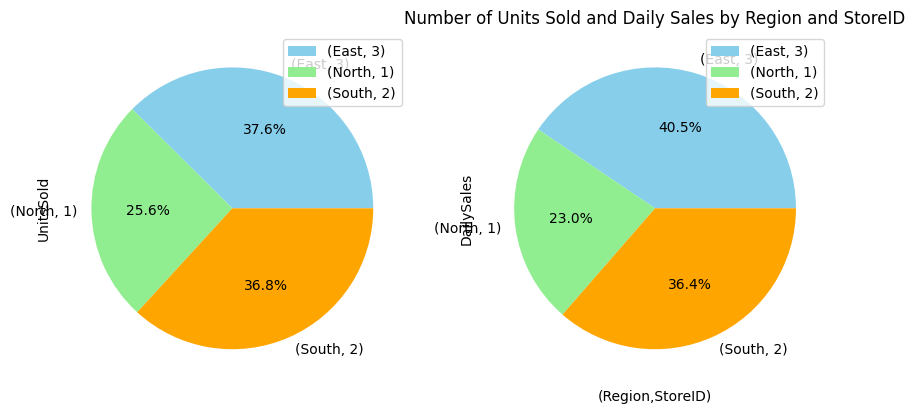

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df.groupby(['Region', 'StoreID'])[['UnitsSold', 'DailySales']].mean().plot(kind='pie', subplots=True, figsize=(10, 6), colors=['skyblue', 'lightgreen','orange'], autopct='%1.1f%%')
plt.xlabel('(Region,StoreID)')
plt.ylabel('DailySales') 
plt.title('Number of Units Sold and Daily Sales by Region and StoreID')
plt.show()


### 2. How do sales trends vary across different product categories and seasons?

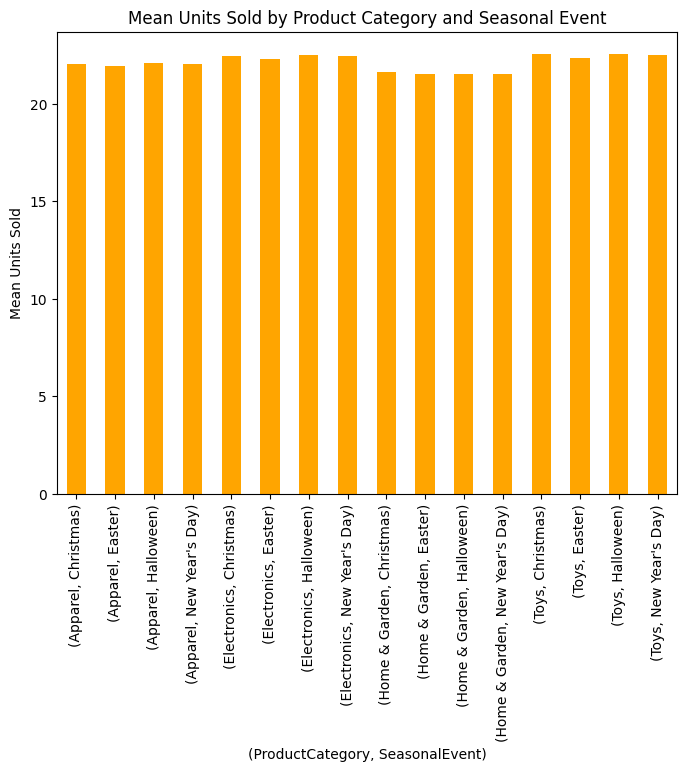

In [13]:
plt.figure(figsize=(8, 6))
mean_units_sold = df.groupby(['ProductCategory', 'SeasonalEvent'])['UnitsSold'].mean()
mean_units_sold.plot(kind='bar', color='orange')
plt.xlabel('(ProductCategory, SeasonalEvent)')
plt.ylabel('Mean Units Sold')
plt.title('Mean Units Sold by Product Category and Seasonal Event')
plt.show()


### 3. Analyze the impact of promotional campaigns on sales.

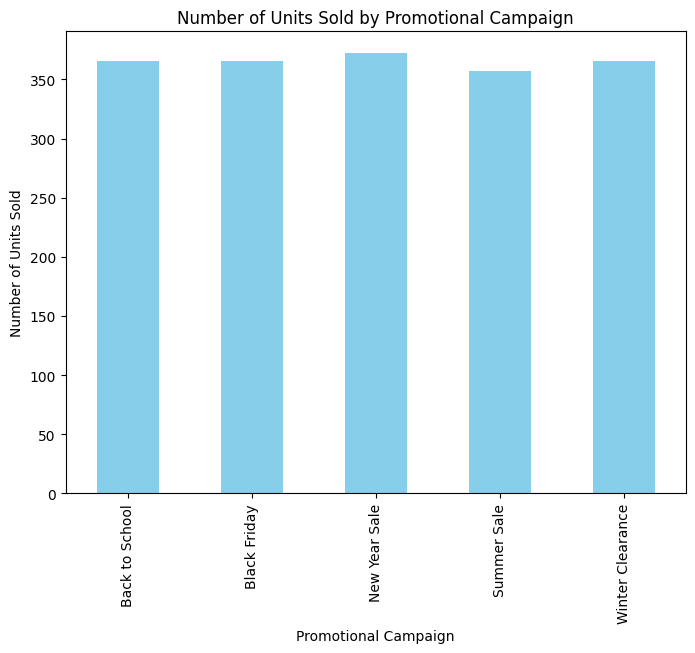

In [14]:
plt.figure(figsize=(8, 6))
mean_units_sold = df.groupby(['PromotionalCampaign'])['UnitsSold'].count()
mean_units_sold.plot(kind='bar', color='skyblue')
plt.xlabel('Promotional Campaign')
plt.ylabel('Number of Units Sold')
plt.title('Number of Units Sold by Promotional Campaign')
plt.show()


# CHALLENGE -3

## 1. Create a dashboard that shows monthly sales performance by region and store. Include the ability to filter by product category and customer demographics.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Assuming df is your DataFrame with the data

# Create dictionaries to map regions to store IDs and vice versa
region_to_store = {
    'North': 'StoreID-1',
    'South': 'StoreID-2',
    'East': 'StoreID-3'
}

store_to_region = {v: k for k, v in region_to_store.items()}

# Add a new column 'Region_Store' to the DataFrame to simplify filtering
df['Region_Store'] = df['Region'].map(region_to_store)

# Convert Date to datetime and extract Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Group by 'Region_Store' and 'Month' to get monthly sales
monthly_sales = df.groupby(['Region_Store', 'Month'])['DailySales'].sum().reset_index()

# Get unique regions from the modified DataFrame
regions = df['Region_Store'].unique()

# Create the dashboard components
@interact(region=regions)
def plot_sales(region):
    # Extract region name and store ID from the combined string
    region_name, store_id = region.split("-")
    region_name = store_to_region[region]  # Get the region name from the store ID
    
    plt.figure(figsize=(10, 6))
    data = monthly_sales[monthly_sales['Region_Store'] == region]
    plt.plot(data['Month'], data['DailySales'], marker='o')
    plt.xlabel('Month')
    plt.ylabel('Monthly Sales')
    plt.title(f'Monthly Sales Performance for {store_id} in {region_name}')  
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()


interactive(children=(Dropdown(description='region', options=('StoreID-1', 'StoreID-2', 'StoreID-3'), value='S…

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Assuming df is your DataFrame with the data

# Create dictionaries to map regions to store IDs and vice versa
region_to_store = {
    'North': 'StoreID-1',
    'South': 'StoreID-2',
    'East': 'StoreID-3'
}

store_to_region = {v: k for k, v in region_to_store.items()}

# Add a new column 'Region_Store' to the DataFrame to simplify filtering
df['Region_Store'] = df['Region'].map(region_to_store)

# Convert Date to datetime and extract Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Group by 'Region_Store' and 'Month' to get monthly sales
monthly_sales = df.groupby(['Region_Store', 'Month'])['DailySales'].sum().reset_index()

# Get unique regions from the modified DataFrame
regions = df['Region_Store'].unique()

# Create the dashboard components
@interact(region=regions)
def plot_sales(region):
    # Extract region name and store ID from the combined string
    region_name, store_id = region.split("-")
    region_name = store_to_region[region]  # Get the region name from the store ID
    
    plt.figure(figsize=(10, 6))
    data = monthly_sales[monthly_sales['Region_Store'] == region]
    plt.bar(data['Month'], data['DailySales'])
    plt.xlabel('Month')
    plt.ylabel('Monthly Sales')
    plt.title(f'Monthly Sales Performance for {store_id} in {region_name}')  
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()


interactive(children=(Dropdown(description='region', options=('StoreID-1', 'StoreID-2', 'StoreID-3'), value='S…

## 2. Include a visualization that compares actual sales to forecasted sales for the next quarter. How do these figures vary by region and store?

### forecasted monthly sales for the next quarter

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
region_to_store = {
    'North': 'StoreID-1',
    'South': 'StoreID-2',
    'East': 'StoreID-3'
}
store_to_region = {v: k for k, v in region_to_store.items()}

# Add a new column 'Region_Store' to the DataFrame to simplify filtering
df['Region_Store'] = df['Region'].map(region_to_store)

# Convert Date to datetime and extract Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Group by 'Region_Store' and 'Month' to get monthly sales
monthly_sales = df.groupby(['Region_Store', 'Month'])['DailySales'].sum().reset_index()
regions = df['Region_Store'].unique()

# Create the dashboard components
@interact(region=regions)
def plot_sales(region):
    region_name, store_id = region.split("-")
    region_name = store_to_region[region]  
    next_quarter_start = pd.Timestamp.today() + pd.DateOffset(months=3)  # Start of next quarter
    next_quarter_end = next_quarter_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)  # End of next quarter
    next_quarter_sales = monthly_sales[(monthly_sales['Region_Store'] == region) & (monthly_sales['Month'] >= next_quarter_start.month) & (monthly_sales['Month'] <= next_quarter_end.month)]
    
    # Plot monthly sales for the next quarter
    plt.figure(figsize=(10, 6))
    plt.plot(next_quarter_sales['Month'], next_quarter_sales['DailySales'], marker='o')
    plt.xlabel('Month')
    plt.ylabel('Monthly Sales')
    plt.title(f'Monthly Sales for Next Quarter in {region_name}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()


interactive(children=(Dropdown(description='region', options=('StoreID-1', 'StoreID-2', 'StoreID-3'), value='S…

### forecasted yearly sales for the next quarter

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
region_to_store = {
    'North': 'StoreID-1',
    'South': 'StoreID-2',
    'East': 'StoreID-3'
}
store_to_region = {v: k for k, v in region_to_store.items()}
df['Region_Store'] = df['Region'].map(region_to_store)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by 'Region_Store' and 'Year' to get yearly sales
yearly_sales = df.groupby(['Region_Store', 'Year'])['DailySales'].sum().reset_index()

# Get unique regions from the modified DataFrame
regions = df['Region_Store'].unique()

# Create the dashboard components
@interact(region=regions)
def plot_sales(region):
    # Extract region name and store ID from the combined string
    region_name, store_id = region.split("-")
    region_name = store_to_region[region]  # Get the region name from the store ID
    # Filter the DataFrame to get yearly sales
    yearly_region_sales = yearly_sales[yearly_sales['Region_Store'] == region]
    
    # Plot yearly sales
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_region_sales['Year'], yearly_region_sales['DailySales'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Yearly Sales')
    plt.title(f'Yearly Sales for {region_name}')
    plt.grid(True)
    plt.show()


interactive(children=(Dropdown(description='region', options=('StoreID-1', 'StoreID-2', 'StoreID-3'), value='S…